<a href="https://colab.research.google.com/github/ghlim40/BT/blob/main/%EB%B9%84%ED%8A%B8%EC%BD%94%EC%9D%B8_%EC%98%88%EC%B8%A1_%EB%B0%8F_%EC%9E%90%EB%8F%99%EB%A7%A4%EB%A7%A4_%EC%97%B0%EC%8A%B5%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **필요한 모듈 설치 및 입력**

In [4]:
!pip install pyjwt #pyubi록 설치를 위해 필요
!pip install pyupbit
#!pip install pandas
#!pip install keras

     |████████████████████████████████| 103 kB 9.5 MB/s 


In [5]:
import pyupbit
import pandas
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import requests
from datetime import datetime
import time
from tqdm import tqdm
import seaborn as sns

## **데이터를 가져올 코인 설정 및 범위 설정**

In [9]:
#KRW거래소에서 가져올수있는 코인 목록
print(pyupbit.get_tickers(fiat="KRW"))

['KRW-BTC', 'KRW-ETH', 'KRW-NEO', 'KRW-MTL', 'KRW-LTC', 'KRW-XRP', 'KRW-ETC', 'KRW-OMG', 'KRW-SNT', 'KRW-WAVES', 'KRW-XEM', 'KRW-QTUM', 'KRW-LSK', 'KRW-STEEM', 'KRW-XLM', 'KRW-ARDR', 'KRW-ARK', 'KRW-STORJ', 'KRW-GRS', 'KRW-REP', 'KRW-ADA', 'KRW-SBD', 'KRW-POWR', 'KRW-BTG', 'KRW-ICX', 'KRW-EOS', 'KRW-TRX', 'KRW-SC', 'KRW-ONT', 'KRW-ZIL', 'KRW-POLY', 'KRW-ZRX', 'KRW-LOOM', 'KRW-BCH', 'KRW-BAT', 'KRW-IOST', 'KRW-RFR', 'KRW-CVC', 'KRW-IQ', 'KRW-IOTA', 'KRW-MFT', 'KRW-ONG', 'KRW-GAS', 'KRW-UPP', 'KRW-ELF', 'KRW-KNC', 'KRW-BSV', 'KRW-THETA', 'KRW-QKC', 'KRW-BTT', 'KRW-MOC', 'KRW-ENJ', 'KRW-TFUEL', 'KRW-MANA', 'KRW-ANKR', 'KRW-AERGO', 'KRW-ATOM', 'KRW-TT', 'KRW-CRE', 'KRW-MBL', 'KRW-WAXP', 'KRW-HBAR', 'KRW-MED', 'KRW-MLK', 'KRW-STPT', 'KRW-ORBS', 'KRW-VET', 'KRW-CHZ', 'KRW-STMX', 'KRW-DKA', 'KRW-HIVE', 'KRW-KAVA', 'KRW-AHT', 'KRW-LINK', 'KRW-XTZ', 'KRW-BORA', 'KRW-JST', 'KRW-CRO', 'KRW-TON', 'KRW-SXP', 'KRW-HUNT', 'KRW-PLA', 'KRW-DOT', 'KRW-SRM', 'KRW-MVL', 'KRW-STRAX', 'KRW-AQT', 'KRW-GLM', 

In [102]:
#가져오고자 하는 코인 이름
coin = "KRW-BTC"

#가져오고자 하는 코인의 주기
#day/minute1/minute3/minute5/minute10/minute15/minute30/minute60/minute240/week/month
coinInterval = "minute60"

#현재 날짜 가져오기
coinTime = datetime.today().strftime("%Y%m%d")

#가져올 행 개수 수동수정필요
coinCount = 1000

In [44]:
#count <= 불러올 행의 개수, 
#to <= interval변수의 기준으로 한단위 전 값까지 가져옴 1min일 경우 1분전 1day일 경우 어제값
dfUpbit = pyupbit.get_ohlcv(coin,count=1000,interval=coinInterval)
dfUpbit_yesterday = pyupbit.get_ohlcv(coin,count=1,interval='day',to=coinTime)
rowCount=len(dfUpbit)

In [48]:
#데이터 프레임 한글로 번역
df_predict = dfUpbit.reset_index()
df_predict['날짜'] = df_predict['index']
df_predict['시가'] = df_predict['open']
df_predict['종가'] = df_predict['close']
df_predict['저가'] = df_predict['low']
df_predict['고가'] = df_predict['high']
df_predict['거래량'] = df_predict['volume']
data_predict = df_predict[['날짜','시가','종가','저가','고가','거래량']]

## **설정값을 보여주는 모니터**

In [91]:
data_predict

,날짜,시가,종가,저가,고가,거래량
0,2021-12-14 21:00:00,4789000.0,4750000.0,4749000.0,4825000.0,8114.243161
1,2021-12-14 22:00:00,4750000.0,4718000.0,4691000.0,4769000.0,3362.968668
2,2021-12-14 23:00:00,4718000.0,4745000.0,4675000.0,4748000.0,2381.514765
3,2021-12-15 00:00:00,4745000.0,4702000.0,4690000.0,4764000.0,1782.393695
4,2021-12-15 01:00:00,4702000.0,4675000.0,4652000.0,4720000.0,1765.370042
...,...,...,...,...,...,...
995,2022-01-25 10:00:00,2905000.0,2916000.0,2895000.0,2925000.0,4580.347860
996,2022-01-25 11:00:00,2916000.0,2939000.0,2901000.0,2941000.0,3047.232103
997,2022-01-25 12:00:00,2941000.0,2951000.0,2931000.0,2960000.0,2243.045201
998,2022-01-25 13:00:00,2952000.0,2895000.0,2887000.0,2958000.0,4256.027901


In [92]:
#float타입으로 coin변수에 해당력 코인 현재가격 출력
print(pyupbit.get_current_price(coin))

2903000.0


In [93]:
print("\n\n불러온 데이터 행 개수 :",coinCount)
print("\n불러온 범위 :\n",dfUpbit.head(1),"\n\n부터\n\n ",dfUpbit.tail(1),"\n\n까지 불러옴")



불러온 데이터 행 개수 : 1000

불러온 범위 :
                           open       high  ...       volume         value
2021-12-14 21:00:00  4789000.0  4825000.0  ...  8114.243161  3.886799e+10

[1 rows x 6 columns] 

부터

                            open       high  ...      volume         value
2022-01-25 14:00:00  2896000.0  2909000.0  ...  750.901617  2.177946e+09

[1 rows x 6 columns] 

까지 불러옴


Text(0.5, 1.0, 'KRW-ETH')

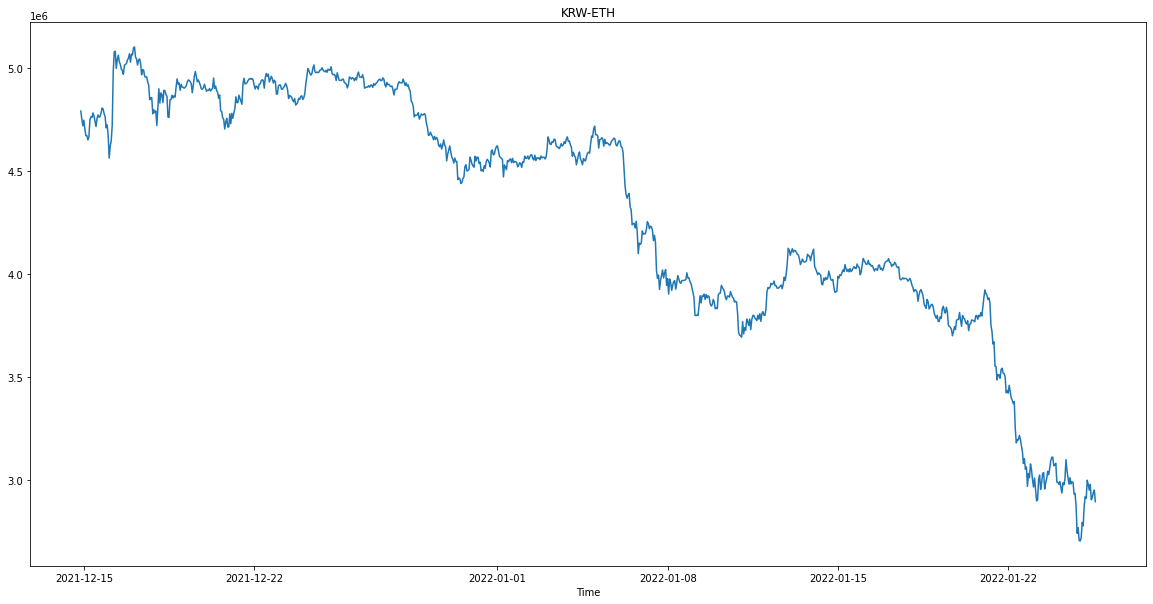

In [94]:
plt.xlabel('Time')
plt.plot(data_predict['날짜'],data_predict['시가']) #그래프를 그릴 항목 설정
plt.rcParams['figure.figsize'] = [20, 10] #그래프 사이즈 설정
plt.title(coin)

## **이동평균선 구하기**

In [108]:
#day/minute1/minute3/minute5/minute10/minute15/minute30/minute60/minute240/week/month
dfUpbit_ma = pyupbit.get_ohlcv(coin,count=100,interval='day')
dfUpbit_ma

,open,high,low,close,volume,value
2021-10-18 09:00:00,75933000.0,77276000.0,74193000.0,76546000.0,8312.737819,6.326885e+11
2021-10-19 09:00:00,76541000.0,79285000.0,75925000.0,78776000.0,9018.170951,6.964016e+11
2021-10-20 09:00:00,78776000.0,81750000.0,78001000.0,79917000.0,14472.097423,1.152411e+12
2021-10-21 09:00:00,79919000.0,80811000.0,76324000.0,76396000.0,15551.933346,1.225372e+12
2021-10-22 09:00:00,76396000.0,77640000.0,74123000.0,74364000.0,11856.844443,9.033713e+11
...,...,...,...,...,...,...
2022-01-21 09:00:00,49600000.0,50001000.0,44600000.0,45316000.0,13031.222695,6.148954e+11
2022-01-22 09:00:00,45316000.0,45622000.0,42629000.0,43375000.0,12317.485273,5.420970e+11
2022-01-23 09:00:00,43376000.0,44500000.0,42725000.0,44253000.0,6165.208729,2.692898e+11
2022-01-24 09:00:00,44255000.0,45600000.0,40871000.0,44731000.0,10984.732576,4.688627e+11


In [109]:
#데이터 프레임 슬라이싱을 통해 날짜와 종가만 남김
data_predict_ma = dfUpbit_ma.loc[:,['open','close']]
data_predict_ma

,open,close
2021-10-18 09:00:00,75933000.0,76546000.0
2021-10-19 09:00:00,76541000.0,78776000.0
2021-10-20 09:00:00,78776000.0,79917000.0
2021-10-21 09:00:00,79919000.0,76396000.0
2021-10-22 09:00:00,76396000.0,74364000.0
...,...,...
2022-01-21 09:00:00,49600000.0,45316000.0
2022-01-22 09:00:00,45316000.0,43375000.0
2022-01-23 09:00:00,43376000.0,44253000.0
2022-01-24 09:00:00,44255000.0,44731000.0


In [110]:
#5일 이평선 
ma5 = data_predict_ma['close'].rolling(window=5).mean()

#20일 이평선
ma20  = data_predict_ma['close'].rolling(window=20).mean()

#현재가격
price = pyupbit.get_current_price(coin)

In [111]:
#계산한 이동평균선 값 병합
data_predict_ma.insert(2,"MA5",ma5)
data_predict_ma.insert(3,"MA20",ma20)

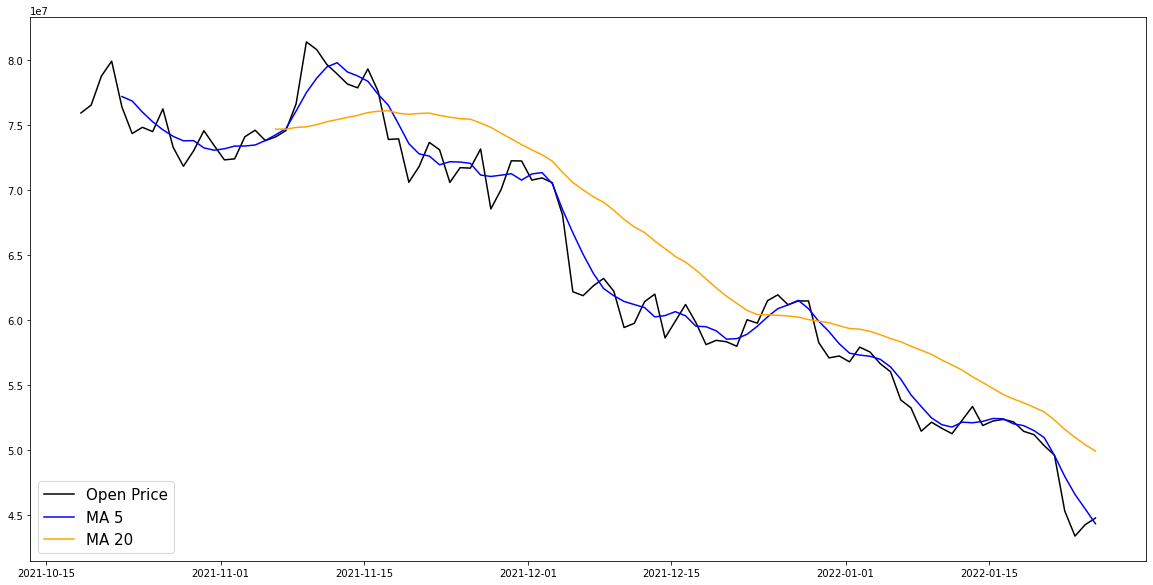

In [127]:
plt.plot(data_predict_ma.index, data_predict_ma['open'],color='k', label="Open Price")
plt.plot(data_predict_ma.index, data_predict_ma['MA5'], color='blue', label="MA 5")
plt.plot(data_predict_ma.index, data_predict_ma['MA20'], color='orange', label="MA 20")
plt.axis('tight')
plt.legend(loc='lower left',fontsize=15)
plt.show()

## **LSTM 딥러닝을 이용한 시계열 분석(수정필요)**

In [ ]:
#750번째 행을 기준으로 훈련과 테스트데이터 분리
split_date = df_predict.loc[[750],['open']]
LSTM_df = df_predict[['날짜','시가','종가','저가','고가','거래량']]
LSTM_train = LSTM_df[0:750]
LSTM_test = LSTM_df[751:1000]
#train = df_predict.loc[:split_date, ['open']]
#test = df_predict.loc[split_date:, ['open']]

In [ ]:
ax = LSTM_train.plot()
LSTM_test.plot(ax=ax)
plt.legend(['LSTM_train', 'LSTM_test'])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fec6df575f0> (for post_execute):


ValueError: ignored

ValueError: ignored